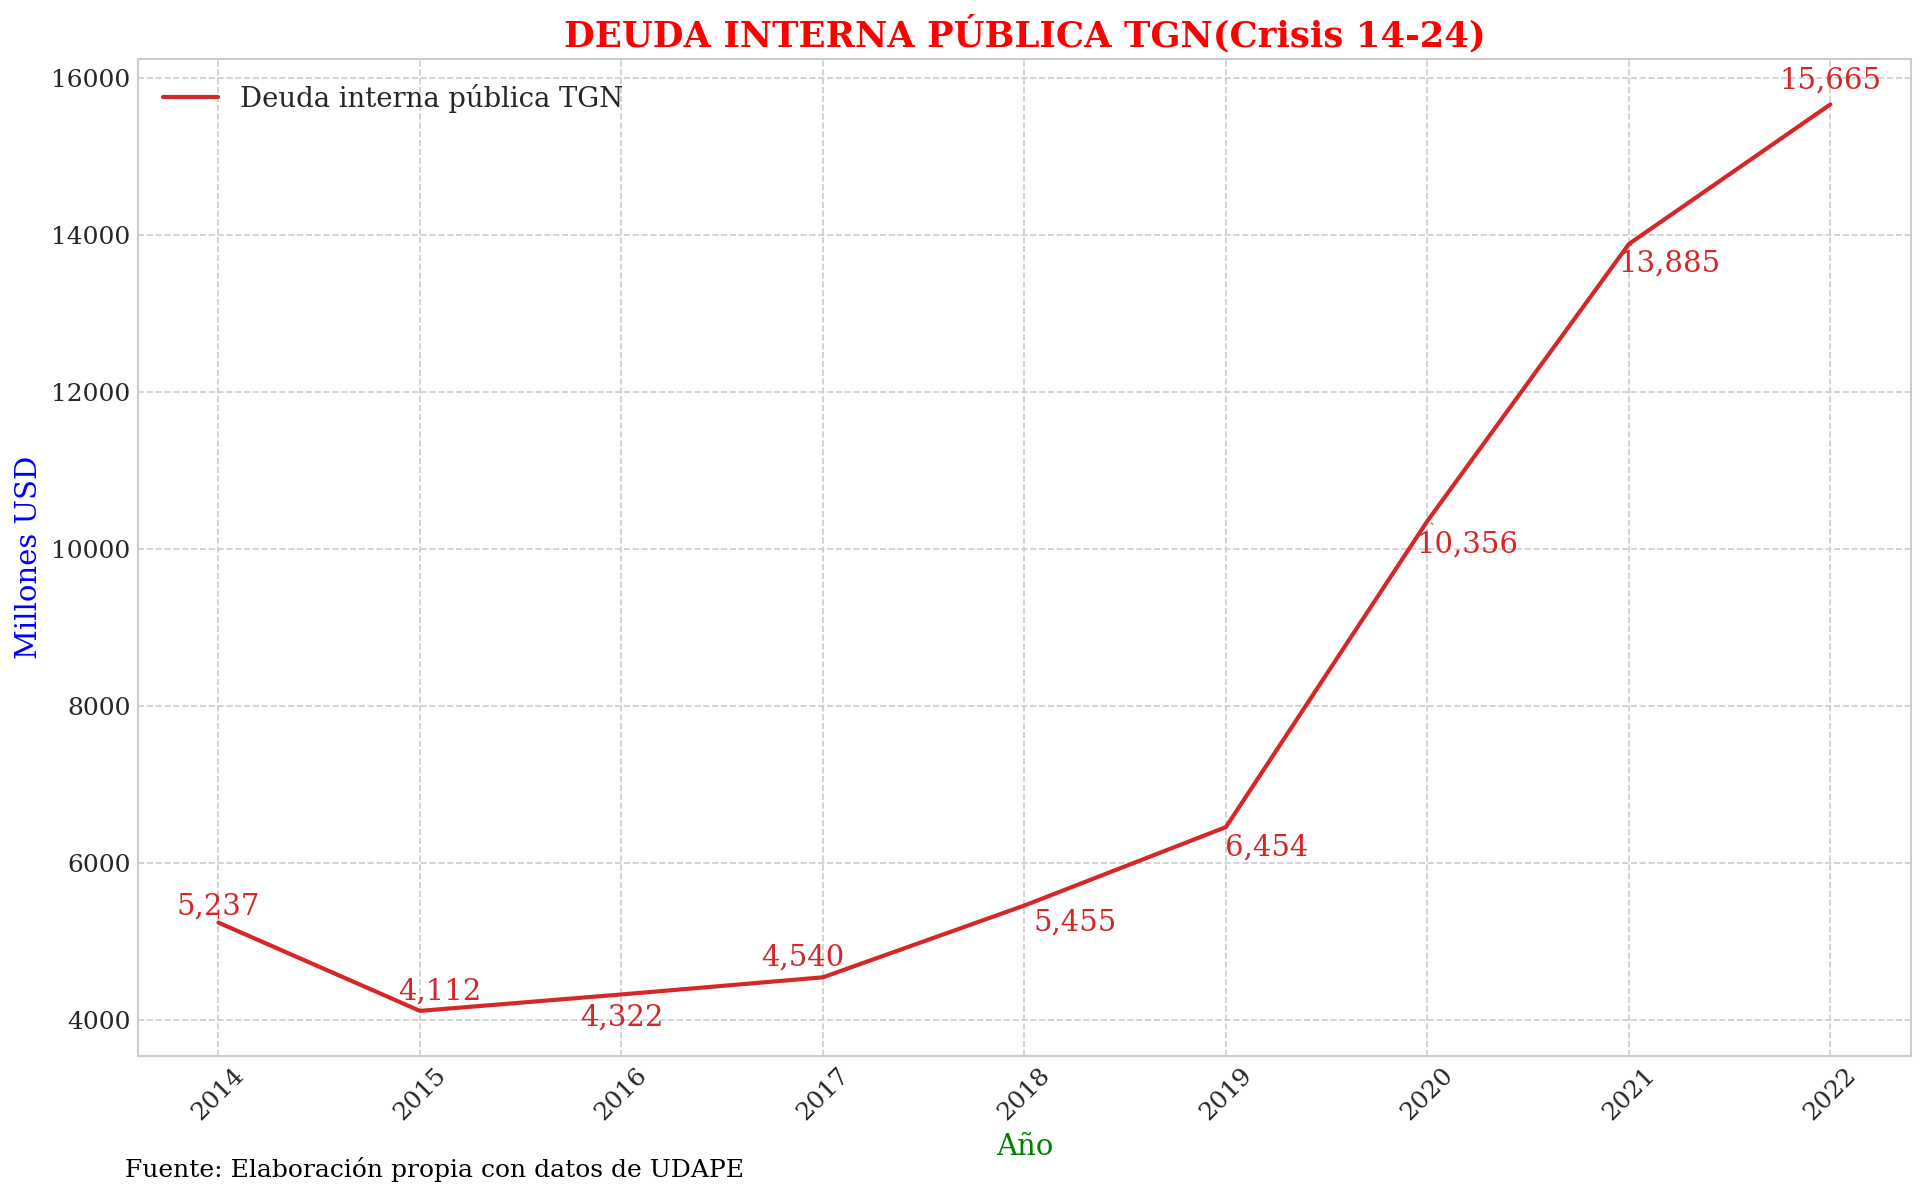

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "deuda_interna"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      valor
    FROM deuda_interna
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("valor", "Deuda interna pública TGN")]
cols_componentes = [col for col, _ in componentes]
colors = {"valor": "#d62728"}

annotation_offsets = {
    "valor": {
        2014: (0,  200),  
        2015: (0.1,  250),   
        2016: (0, -300),   
        2017: (-0.1,  250),
        2018: (0.25,  -220),
        2019: (0.2,  -260),
        2020: (0.2, -300),
        2021: (0.2,  -250),   
        2022: (0,  300),
        2023: (0.3,  200),
        2024: (0,  -200),   
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty:
        continue
    if len(sub) < 3:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"DEUDA INTERNA PÚBLICA TGN({nombre})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Elaboración propia con datos de UDAPE",
    )
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )

    fig.savefig(output_dir / f"deuda_interna_{nombre}.png")
    plt.show()
    plt.close(fig)
